In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import random
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer

plt.style.use("fivethirtyeight")

In [3]:
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams.update({"font.size": 14})

<IPython.core.display.Javascript object>

### Numerical Features

#### Threshold

In [4]:
voltage = np.random.randint(0, 100, 120)
timestamp = ["t_" + str(i) for i in range(len(voltage))]
df = pd.DataFrame({"timestamp": timestamp, "voltage": voltage})
df.head(10)

,timestamp,voltage
0,t_0,78
1,t_1,82
2,t_2,61
3,t_3,30
4,t_4,20
5,t_5,7
6,t_6,49
7,t_7,23
8,t_8,59
9,t_9,31


<IPython.core.display.Javascript object>

In [5]:
df["voltage_safe_str"] = np.where(df["voltage"] < 80, "safe", "unsafe")
df["voltage_safe_int"] = np.where(df["voltage"] < 80, 0, 1)
df.head(10)

,timestamp,voltage,voltage_safe_str,voltage_safe_int
0,t_0,78,safe,0
1,t_1,82,unsafe,1
2,t_2,61,safe,0
3,t_3,30,safe,0
4,t_4,20,safe,0
5,t_5,7,safe,0
6,t_6,49,safe,0
7,t_7,23,safe,0
8,t_8,59,safe,0
9,t_9,31,safe,0


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

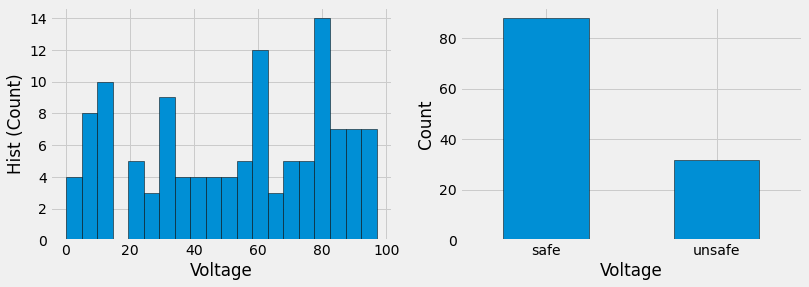

<IPython.core.display.Javascript object>

In [6]:
plt.subplot(1, 2, 1)
plt.hist(df["voltage"], bins=20, edgecolor="black")
plt.xlabel("Voltage")
plt.ylabel("Hist (Count)")
plt.subplot(1, 2, 2)
df["voltage_safe_str"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("Voltage")
plt.ylabel("Count")

In [7]:
feat = np.concatenate(
    [
        np.random.randint(0, 1, 100),
        np.random.randint(0, 10, 100),
        np.random.randint(10, 100, 100),
    ]
)
np.random.shuffle(feat)
song_id = ["song_id_" + str(i) for i in range(len(feat))]
df = pd.DataFrame({"song_id": song_id, "listen_count": feat})
df.head(10)

,song_id,listen_count
0,song_id_0,1
1,song_id_1,91
2,song_id_2,0
3,song_id_3,6
4,song_id_4,1
5,song_id_5,43
6,song_id_6,7
7,song_id_7,91
8,song_id_8,10
9,song_id_9,2


<IPython.core.display.Javascript object>

In [8]:
df["like_str"] = np.where(df["listen_count"] > 1, "like", "unlike")

bn = Binarizer(threshold=1)
df["like_int"] = bn.transform([df["listen_count"]])[0]

df.head(10)

,song_id,listen_count,like_str,like_int
0,song_id_0,1,unlike,0
1,song_id_1,91,like,1
2,song_id_2,0,unlike,0
3,song_id_3,6,like,1
4,song_id_4,1,unlike,0
5,song_id_5,43,like,1
6,song_id_6,7,like,1
7,song_id_7,91,like,1
8,song_id_8,10,like,1
9,song_id_9,2,like,1


<IPython.core.display.Javascript object>

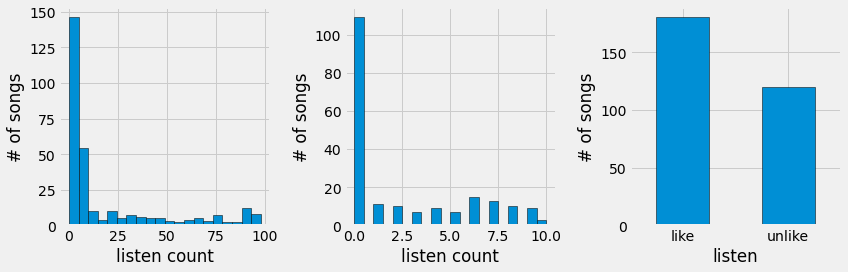

<IPython.core.display.Javascript object>

In [9]:
plt.subplot(1, 3, 1)
plt.hist(df["listen_count"], bins=20, edgecolor="black")
plt.xlabel("listen count")
plt.ylabel("# of songs")
plt.subplot(1, 3, 2)
plt.hist(df["listen_count"], bins=20, edgecolor="black", range=[0, 10])
plt.xlabel("listen count")
plt.ylabel("# of songs")
plt.subplot(1, 3, 3)
df["like_str"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("listen")
plt.ylabel("# of songs")
plt.tight_layout()

#### Positive vs Negative

In [10]:
sentiment_score = np.random.randint(-10, 10, 100)
review_id = ["review_id_" + str(i) for i in range(len(sentiment_score))]
df = pd.DataFrame({"review_id": review_id, "sentiment_score": sentiment_score})
df.head(10)

,review_id,sentiment_score
0,review_id_0,-6
1,review_id_1,0
2,review_id_2,-9
3,review_id_3,-5
4,review_id_4,8
5,review_id_5,-4
6,review_id_6,-1
7,review_id_7,-7
8,review_id_8,8
9,review_id_9,9


<IPython.core.display.Javascript object>

In [11]:
df["sentiment_polarity"] = np.where(df["sentiment_score"] < 0, "negative", "positive")
df["sentiment_polarity_int"] = np.where(df["sentiment_score"] < 0, 0, 1)

df.head(10)

,review_id,sentiment_score,sentiment_polarity,sentiment_polarity_int
0,review_id_0,-6,negative,0
1,review_id_1,0,positive,1
2,review_id_2,-9,negative,0
3,review_id_3,-5,negative,0
4,review_id_4,8,positive,1
5,review_id_5,-4,negative,0
6,review_id_6,-1,negative,0
7,review_id_7,-7,negative,0
8,review_id_8,8,positive,1
9,review_id_9,9,positive,1


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

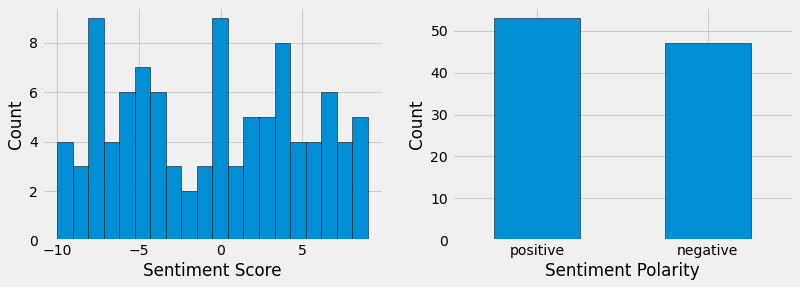

<IPython.core.display.Javascript object>

In [12]:
plt.subplot(1, 2, 1)
plt.hist(df["sentiment_score"], bins=20, edgecolor="black")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
df["sentiment_polarity"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Count")


#### Outlier

In [13]:
sensor = np.random.randint(0, 10, 100)
timestamp = ["t_" + str(i) for i in range(len(sensor))]
df = pd.DataFrame({"timestamp": timestamp, "sensor": sensor})
df.loc[2, "sensor"] = 99
df.loc[7, "sensor"] = 47
df.head(10)

,timestamp,sensor
0,t_0,2
1,t_1,9
2,t_2,99
3,t_3,7
4,t_4,7
5,t_5,6
6,t_6,3
7,t_7,47
8,t_8,5
9,t_9,7


<IPython.core.display.Javascript object>

In [14]:
thres_low = df["sensor"].mean() - 3 * df["sensor"].std()
thres_high = df["sensor"].mean() + 3 * df["sensor"].std()

df["outlier_int"] = np.where(
    ((df["sensor"] > thres_high) | (df["sensor"] < thres_low)), 1, 0
)

df["outlier_str"] = np.where(abs(stats.zscore(df["sensor"])) > 3, "yes", "no")

df.head(10)

,timestamp,sensor,outlier_int,outlier_str
0,t_0,2,0,no
1,t_1,9,0,no
2,t_2,99,1,yes
3,t_3,7,0,no
4,t_4,7,0,no
5,t_5,6,0,no
6,t_6,3,0,no
7,t_7,47,1,yes
8,t_8,5,0,no
9,t_9,7,0,no


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

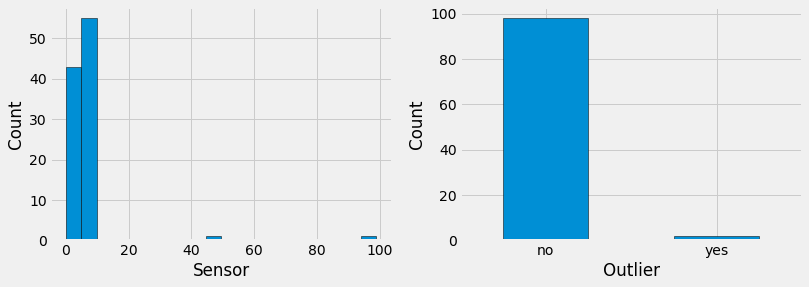

<IPython.core.display.Javascript object>

In [15]:
plt.subplot(1, 2, 1)
plt.hist(df["sensor"], bins=20, edgecolor="black")
plt.xlabel("Sensor")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
df["outlier_str"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("Outlier")
plt.ylabel("Count")

### Categorical Features

#### Grouping

In [16]:
groups = ["infant", "toddler", "child", "teen", "adult", "senior"]
age_group = random.choices(groups, k=100)
person_id = ["person_id_" + str(i) for i in range(len(age_group))]
df = pd.DataFrame({"person_id": person_id, "age_group": age_group})
df.head(10)

,person_id,age_group
0,person_id_0,child
1,person_id_1,adult
2,person_id_2,senior
3,person_id_3,child
4,person_id_4,senior
5,person_id_5,child
6,person_id_6,teen
7,person_id_7,infant
8,person_id_8,child
9,person_id_9,toddler


<IPython.core.display.Javascript object>

In [17]:
df["major_str"] = np.where(df["age_group"].isin(["adult", "senior"]), "yes", "no")

age_group_map = {
    "infant": 0,
    "toddler": 0,
    "child": 0,
    "teen": 0,
    "adult": 1,
    "senior": 1,
}

df["major_int"] = df["age_group"].map(age_group_map)

df.head(10)

,person_id,age_group,major_str,major_int
0,person_id_0,child,no,0
1,person_id_1,adult,yes,1
2,person_id_2,senior,yes,1
3,person_id_3,child,no,0
4,person_id_4,senior,yes,1
5,person_id_5,child,no,0
6,person_id_6,teen,no,0
7,person_id_7,infant,no,0
8,person_id_8,child,no,0
9,person_id_9,toddler,no,0


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

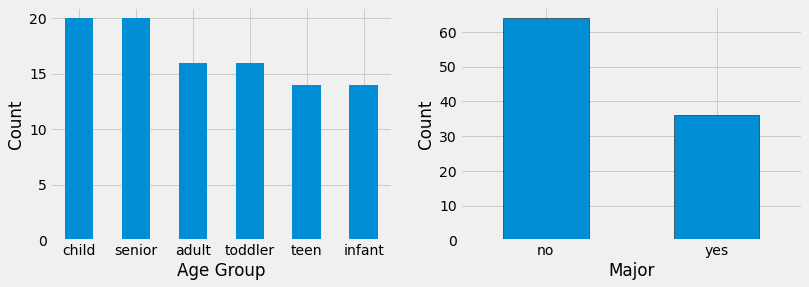

<IPython.core.display.Javascript object>

In [18]:
plt.subplot(1, 2, 1)
df["age_group"].value_counts().plot(kind="bar", rot=0)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
df["major_str"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("Major")
plt.ylabel("Count")

#### One vs All

In [3]:
states_list = ["VIC", "NSW", "WA", "QLD", "NT", "SA", "ACT", "TAS"]
state = random.choices(states_list, k=100)
customer_id = ["customer_id_" + str(i) for i in range(len(state))]

df = pd.DataFrame({"customer_id": customer_id, "state": state})
df.head(10)

,customer_id,state
0,customer_id_0,NSW
1,customer_id_1,NSW
2,customer_id_2,WA
3,customer_id_3,ACT
4,customer_id_4,VIC
5,customer_id_5,TAS
6,customer_id_6,SA
7,customer_id_7,QLD
8,customer_id_8,NSW
9,customer_id_9,NSW


In [4]:
df["state_VIC"] = np.where(df["state"] == "VIC", "yes", "no")
df.sample(10)

,customer_id,state,state_VIC
35,customer_id_35,VIC,yes
45,customer_id_45,WA,no
18,customer_id_18,ACT,no
42,customer_id_42,NT,no
39,customer_id_39,VIC,yes
46,customer_id_46,TAS,no
43,customer_id_43,QLD,no
2,customer_id_2,WA,no
31,customer_id_31,QLD,no
12,customer_id_12,SA,no


Text(0, 0.5, 'Count')

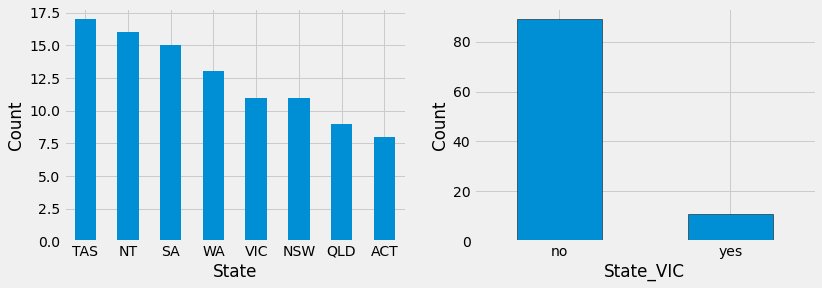

<IPython.core.display.Javascript object>

In [21]:
plt.subplot(1, 2, 1)
df["state"].value_counts().plot(kind="bar", rot=0)
plt.xlabel("State")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
df["state_VIC"].value_counts().plot(kind="bar", rot=0, edgecolor="black")
plt.xlabel("State_VIC")
plt.ylabel("Count")